In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from math import sqrt
from statistics import mean 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestClassifier
from sklearn import ensemble

In [2]:
df = pd.read_csv('../data/Most300_Stations.csv')
df.fillna(0, inplace = True)
selected_cols=['start station latitude','start station longitude', 'start hour',\
               'start year','start month','start day','start dayofweek','start station checkout counts',\
               'start station checkin counts','Isweekday', 'Temperature', 'PRCP', 'SNOW', 'usertype', 'gender', 'commute' ] 
df = df[selected_cols]

In [3]:
df.head(10)

,start station latitude,start station longitude,start hour,start year,start month,start day,start dayofweek,start station checkout counts,start station checkin counts,Isweekday,Temperature,PRCP,SNOW,usertype,gender,commute
0,40.722293,-73.991475,0.0,2019.0,9.0,11.0,3.0,0.0,0.0,1.0,78.2,1.0,0,Subscriber,2.0,0
1,40.709560,-74.006536,0.0,2019.0,9.0,13.0,5.0,0.0,0.0,1.0,66.4,1.0,0,Subscriber,2.0,0
2,40.724561,-73.995653,0.0,2019.0,9.0,4.0,3.0,0.0,0.0,1.0,77.3,1.0,0,Subscriber,2.0,0
3,40.751581,-73.977910,8.0,2019.0,9.0,5.0,4.0,1.0,0.0,1.0,71.6,0.0,0,Subscriber,1.0,1
4,40.749013,-73.988484,0.0,2019.0,9.0,9.0,1.0,0.0,0.0,1.0,72.3,0.0,0,Subscriber,2.0,0
5,40.736502,-73.978095,0.0,2019.0,9.0,5.0,4.0,0.0,0.0,1.0,71.6,0.0,0,Subscriber,2.0,0
6,40.739445,-73.976806,0.0,2019.0,9.0,5.0,4.0,0.0,0.0,1.0,71.6,0.0,0,Subscriber,1.0,0
7,40.758985,-73.993800,0.0,2019.0,9.0,10.0,2.0,0.0,0.0,1.0,72.5,1.0,0,Subscriber,2.0,0
8,40.730207,-73.991026,0.0,2019.0,9.0,12.0,4.0,0.0,0.0,1.0,74.8,0.0,0,Subscriber,0.0,0
9,40.757973,-73.966033,0.0,2019.0,9.0,11.0,3.0,0.0,0.0,1.0,78.2,1.0,0,Subscriber,2.0,0


# Linear Regression

## Dummified

In [45]:
columns = ['start dayofweek', "start hour", "start year", "start month", "usertype"]
df_dummified = pd.get_dummies(df, columns=columns, prefix=columns, drop_first=True)

In [46]:
# Split target and features for data set
X = df_dummified.drop(['start station checkout counts','start day',\
                           'start station checkin counts'],axis = 1)
y = df_dummified['start station checkout counts']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Multuple Linear Regression

In [48]:
ols = linear_model.LinearRegression()
ols.fit(X_train,y_train)
print("Coeficients:")
print(pd.DataFrame(zip(X_train.columns, ols.coef_)).sort_values(by=1))
print("R^2 train: %f" %(ols.score(X_train, y_train)))
print("R^2 test : %f" %(ols.score(X_test, y_test)))

Coeficients:
                          0             1
48         start month_12.0 -8.177216e+06
37        start year_2020.0 -8.177216e+06
45          start month_9.0 -8.177216e+06
47         start month_11.0 -8.177216e+06
46         start month_10.0 -8.177216e+06
1   start station longitude -4.363817e-01
43          start month_7.0 -2.875602e-02
40          start month_4.0 -2.853197e-02
44          start month_8.0 -1.762545e-02
42          start month_6.0 -1.728445e-02
41          start month_5.0 -1.512358e-02
5                      SNOW -7.368345e-03
49      usertype_Subscriber -3.625408e-03
4                      PRCP -2.535312e-03
11      start dayofweek_5.0 -7.573962e-04
6                    gender  2.406971e-04
39          start month_3.0  3.467202e-04
3               Temperature  1.055881e-03
8       start dayofweek_2.0  1.118202e-03
38          start month_2.0  1.343846e-03
10      start dayofweek_4.0  3.524244e-03
9       start dayofweek_3.0  4.765689e-03
7                   c

In [49]:
model = sm.OLS(list(y_train), X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 2.459e+04
Date:                Mon, 09 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:23:07   Log-Likelihood:                -50761.
No. Observations:              323031   AIC:                         1.016e+05
Df Residuals:                  322982   BIC:                         1.021e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
start station latitude    

## Lasso

In [50]:
lasso = Lasso(normalize=True,max_iter=3000,tol=0.01)
alphas = np.logspace(-8,-2.2,40)

alpha_coefs = []
for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X, y)
    alpha_coefs.append(lasso.coef_)
    
# the order of predictors to become zero coefficient
coefs_df = pd.DataFrame(alpha_coefs, index=alphas, columns = list(X.columns))

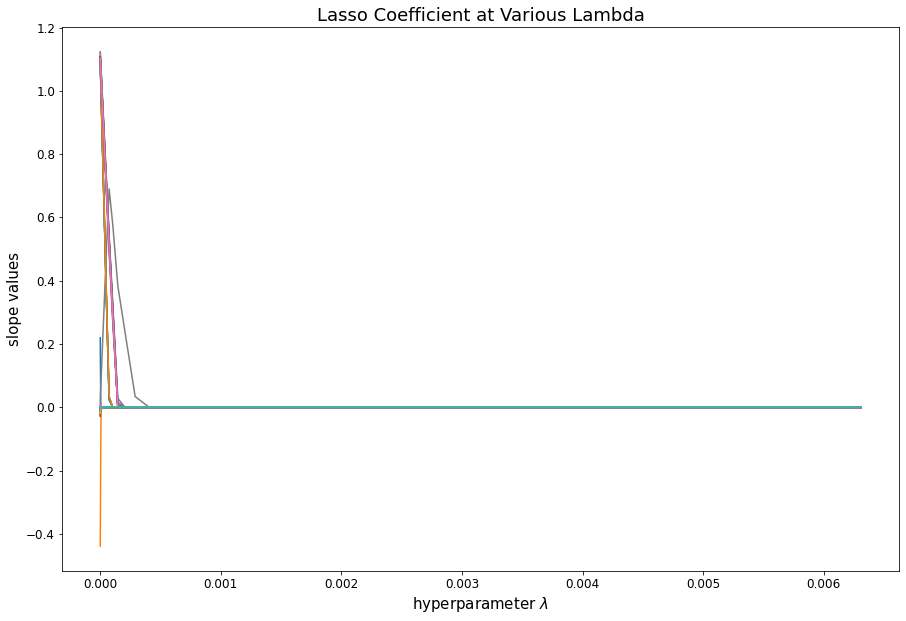

In [51]:
plt.figure(figsize=(15,10))
for name in coefs_df.columns:
    plt.plot(coefs_df.index, coefs_df[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$', fontsize = 15)
plt.ylabel(r'slope values', fontsize = 15) 
plt.title('Lasso Coefficient at Various Lambda', fontsize = 18)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12);

In [52]:
alpha_zero = {}
for col in coefs_df.columns:
    for alpha in coefs_df.index:
        if coefs_df.loc[alpha, col] == 0:
            alpha_zero[col] = alpha
            break
alpha_zero = sorted(alpha_zero.items(), key=lambda x: x[1], reverse=True)
alpha_zero

[('commute', 0.00040762086875748845),
 ('start hour_4.0', 0.00020550411038122338),
 ('start hour_6.0', 0.00020550411038122338),
 ('start hour_11.0', 0.00020550411038122338),
 ('start hour_12.0', 0.00020550411038122338),
 ('start hour_14.0', 0.00020550411038122338),
 ('start hour_15.0', 0.00020550411038122338),
 ('start hour_19.0', 0.00020550411038122338),
 ('start hour_21.0', 0.00020550411038122338),
 ('start hour_1.0', 0.00014591588182897718),
 ('start hour_2.0', 0.00014591588182897718),
 ('start hour_3.0', 0.00014591588182897718),
 ('start hour_5.0', 0.00014591588182897718),
 ('start hour_10.0', 0.00014591588182897718),
 ('start hour_13.0', 0.00014591588182897718),
 ('start hour_20.0', 0.00014591588182897718),
 ('start hour_22.0', 0.00014591588182897718),
 ('start hour_23.0', 0.00014591588182897718),
 ('start hour_7.0', 0.00010360593046256342),
 ('start hour_8.0', 0.00010360593046256342),
 ('start hour_9.0', 0.00010360593046256342),
 ('start hour_16.0', 0.00010360593046256342),
 ('st

In [53]:
print('Training score for train dataset is %.3f.' %(lasso.score(X_train,y_train)))
print('Testing score for train dataset is %.3f.' %(lasso.score(X_test,y_test)))

Training score for train dataset is -0.000.
Testing score for train dataset is -0.000.


## Ridge

In [9]:
ridge = Ridge()
ridge.set_params(alpha=.01, normalize=False)
ridge.fit(X_train,y_train)
print('The intercept is %.4f' %(ridge.intercept_))
ridgeCoef = pd.Series(ridge.coef_, index=X_train.columns)
print('The slopes are \n%s' %(ridgeCoef.sort_values()))
ridge.score(X_train, y_train)

The intercept is -42.1786
The slopes are 
start station longitude   -0.437953
start month_7.0           -0.028755
start month_4.0           -0.028530
start month_8.0           -0.017625
start month_6.0           -0.017282
start month_5.0           -0.015123
start month_12.0          -0.010628
SNOW                      -0.007368
start year_2020.0         -0.004653
usertype_Subscriber       -0.003626
Isweekday                 -0.003030
PRCP                      -0.002535
start dayofweek_7.0       -0.001020
start dayofweek_5.0       -0.000756
gender                     0.000237
start month_3.0            0.000348
Temperature                0.001056
start dayofweek_2.0        0.001120
start month_2.0            0.001346
start month_9.0            0.002783
start dayofweek_4.0        0.003525
start dayofweek_6.0        0.004050
start dayofweek_3.0        0.004765
start month_11.0           0.005228
start month_10.0           0.007269
commute                    0.011759
start station latitude

0.7851677651379775

In [10]:
ridge.score(X_test, y_test)

0.7797006580592092

In [11]:
ridge.score(X_train, y_train)

0.7851677651379775

In [12]:
ridge_coefs = []
ridge_intercepts = []
R2_train  = []
R2_test = []
alphaRange = np.linspace(1e-10,10,25)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize = False)  
    ridge.fit(X_train, y_train)
    ridge_intercepts.append(ridge.intercept_)
    ridge_coefs.append(ridge.coef_)
    R2_train.append(ridge.score(X_train, y_train))
    R2_test.append(ridge.score(X_test, y_test))

C:\Users\kkrle\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.07668e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [13]:
ridge_coefs_matrix = pd.DataFrame(ridge_coefs, columns=X_train.columns)
ridge_coefs_matrix['alpha'] = alphaRange
ridge_coefs_matrix['R2_train'] = R2_train
ridge_coefs_matrix['R2_test'] = R2_test
ridge_coefs_matrix

,start station latitude,start station longitude,Isweekday,Temperature,PRCP,SNOW,gender,commute,start dayofweek_2.0,start dayofweek_3.0,...,start month_7.0,start month_8.0,start month_9.0,start month_10.0,start month_11.0,start month_12.0,usertype_Subscriber,alpha,R2_train,R2_test
0,0.239621,-0.438038,0.023156,0.001056,-0.002535,-0.007368,0.000238,0.011751,0.001120,0.004765,...,-0.028755,-0.017625,0.108494,0.112980,0.110939,0.095083,-0.003626,1.000000e-10,0.785168,0.779701
1,0.238089,-0.434517,-0.003051,0.001056,-0.002535,-0.007370,0.000233,0.012085,0.001119,0.004765,...,-0.028755,-0.017624,0.002786,0.007272,0.005227,-0.010630,-0.003624,4.166667e-01,0.785168,0.779701
2,0.236579,-0.431051,-0.003072,0.001056,-0.002535,-0.007372,0.000229,0.012418,0.001118,0.004765,...,-0.028754,-0.017622,0.002789,0.007274,0.005226,-0.010632,-0.003623,8.333333e-01,0.785168,0.779701
3,0.235090,-0.427639,-0.003093,0.001056,-0.002535,-0.007374,0.000224,0.012751,0.001117,0.004765,...,-0.028754,-0.017620,0.002793,0.007277,0.005226,-0.010635,-0.003621,1.250000e+00,0.785168,0.779701
4,0.233623,-0.424279,-0.003115,0.001056,-0.002535,-0.007375,0.000220,0.013083,0.001116,0.004765,...,-0.028753,-0.017618,0.002796,0.007279,0.005225,-0.010637,-0.003620,1.666667e+00,0.785167,0.779700
5,0.232176,-0.420970,-0.003136,0.001056,-0.002536,-0.007377,0.000216,0.013416,0.001116,0.004765,...,-0.028753,-0.017616,0.002799,0.007282,0.005224,-0.010639,-0.003619,2.083333e+00,0.785167,0.779700
6,0.230749,-0.417710,-0.003157,0.001056,-0.002536,-0.007378,0.000211,0.013748,0.001115,0.004765,...,-0.028752,-0.017614,0.002802,0.007284,0.005223,-0.010641,-0.003617,2.500000e+00,0.785167,0.779700
7,0.229343,-0.414500,-0.003178,0.001056,-0.002536,-0.007380,0.000207,0.014080,0.001114,0.004764,...,-0.028751,-0.017612,0.002805,0.007287,0.005222,-0.010643,-0.003616,2.916667e+00,0.785167,0.779700
8,0.227956,-0.411337,-0.003199,0.001056,-0.002536,-0.007381,0.000203,0.014412,0.001113,0.004764,...,-0.028750,-0.017610,0.002809,0.007289,0.005222,-0.010646,-0.003614,3.333333e+00,0.785166,0.779699
9,0.226587,-0.408221,-0.003221,0.001056,-0.002536,-0.007383,0.000198,0.014743,0.001112,0.004764,...,-0.028749,-0.017608,0.002812,0.007292,0.005221,-0.010648,-0.003613,3.750000e+00,0.785166,0.779699


## Xgboost

In [14]:
columns = ["usertype"]
df_dummified = pd.get_dummies(df, columns=columns, prefix=columns, drop_first=True)
X = df_dummified.drop(['start station checkout counts','start day',\
                           'start station checkin counts'],axis = 1)
y = df_dummified['start station checkout counts']

In [15]:
# Split the train data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [16]:
xgb = XGBRegressor()
xgb.set_params(subsample=0.7,random_state=42, n_estimators=700,eta=0.12,max_depth = 8,verbose=1,n_jobs=6)
xgb.fit(X_train, y_train)

[13:40:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.12, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.119999997, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=6, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbose=1,
             verbosity=None)

In [17]:
print('Training score is %.3f' %(xgb.score(X_train,y_train)))
print('Testing score is %.3f' %(xgb.score(X_test,y_test)))

Training score is 0.885
Testing score is 0.824


In [18]:
sorted_importance_xgb = sorted(zip(X_train.columns.values, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance_xgb

[('start hour', 0.7306791),
 ('start year', 0.02985437),
 ('Temperature', 0.027022345),
 ('start station longitude', 0.02696744),
 ('PRCP', 0.026066523),
 ('start month', 0.026008891),
 ('start station latitude', 0.025827985),
 ('start dayofweek', 0.025450965),
 ('commute', 0.024071071),
 ('SNOW', 0.022366824),
 ('usertype_Subscriber', 0.017893152),
 ('gender', 0.017791323),
 ('Isweekday', 0.0)]

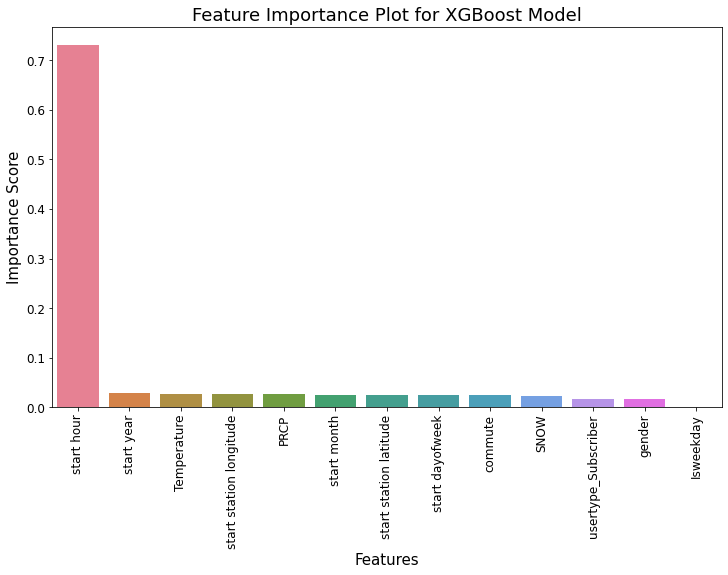

In [35]:
plt.rcParams['figure.figsize'] = (12,7)
a, b = zip(*sorted_importance_xgb) # this splits the list of tuples into two lists
sns.barplot(x ='feature_name',y ='importance_score', data = pd.DataFrame({'feature_name':a, 'importance_score':b}),\
            palette='husl')
plt.title('Feature Importance Plot for XGBoost Model', fontsize = 18)
plt.xlabel('Features',fontsize = 15)
plt.ylabel('Importance Score',fontsize = 15)
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90,fontsize = 12);

In [20]:
grid_params = {'max_depth': range(4,8,3),
                'eta':np.linspace(0.02,0.1,5)}
grid_search_xgb = GridSearchCV(xgb, grid_params, cv = 3)
grid_search_xgb.fit(X_train,y_train)

[13:47:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:50:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:52:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings

[15:28:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:36:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, eta=0.12, gamma=0,
                                    gpu_id=-1, importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.119999997, max_delta_step=0,
                                    max_depth=8, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=700, n_jobs=6,
                                    num_parallel_tree=1, random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=0.7,
                                    tree_method='exact', validate_parameters=1,
                                    verbose=1,

In [21]:
grid_search_xgb.best_params_

{'eta': 0.02, 'max_depth': 7}

In [22]:
grid_search_xgb.score(X_train,y_train)

0.8553744347224687

In [23]:
grid_search_xgb.score(X_test,y_test)

0.8116579590249033

## Gradient Boosting

In [24]:
gbm = GradientBoostingRegressor()
gbm.set_params(learning_rate=0.03, n_estimators=1000, subsample=0.7, loss='ls', max_depth=4,\
               min_impurity_decrease=0.01,random_state = 42,verbose=1)
gbm.fit(X_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.3552           0.0173           27.71m
         2           0.3398           0.0163           28.48m
         3           0.3254           0.0153           26.12m
         4           0.3100           0.0144           25.25m
         5           0.2951           0.0136           24.15m
         6           0.2823           0.0128           23.63m
         7           0.2715           0.0121           24.75m
         8           0.2596           0.0113           24.76m
         9           0.2506           0.0106           24.78m
        10           0.2407           0.0100           24.33m
        20           0.1660           0.0055           25.86m
        30           0.1268           0.0030           25.98m
        40           0.1056           0.0016           26.05m
        50           0.0930           0.0009           26.12m
        60           0.0873           0.0005           25.67m
       

GradientBoostingRegressor(learning_rate=0.03, max_depth=4,
                          min_impurity_decrease=0.01, n_estimators=1000,
                          random_state=42, subsample=0.7, verbose=1)

In [25]:
print('Training score is %.3f' %gbm.score(X_train,y_train))
print('Testing score is %.3f' %gbm.score(X_test,y_test))

Training score is 0.794
Testing score is 0.787


In [26]:
sorted_importance_gbm = sorted(zip(X_train.columns.values, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance_gbm

[('start hour', 0.9872826354377786),
 ('start station longitude', 0.0033855563140188535),
 ('start station latitude', 0.0033350369067385293),
 ('Temperature', 0.0032779855667367306),
 ('start month', 0.0010978264164676216),
 ('start dayofweek', 0.0006749691167481943),
 ('start year', 0.00024351897772864045),
 ('Isweekday', 0.0001981670033149541),
 ('commute', 0.00019415059227011045),
 ('PRCP', 0.00010585893657459476),
 ('gender', 9.475092490891755e-05),
 ('usertype_Subscriber', 5.70708280012203e-05),
 ('SNOW', 5.247297871279893e-05)]

Text(0.5, 1.0, 'Feature Importance Plot for GBM model')

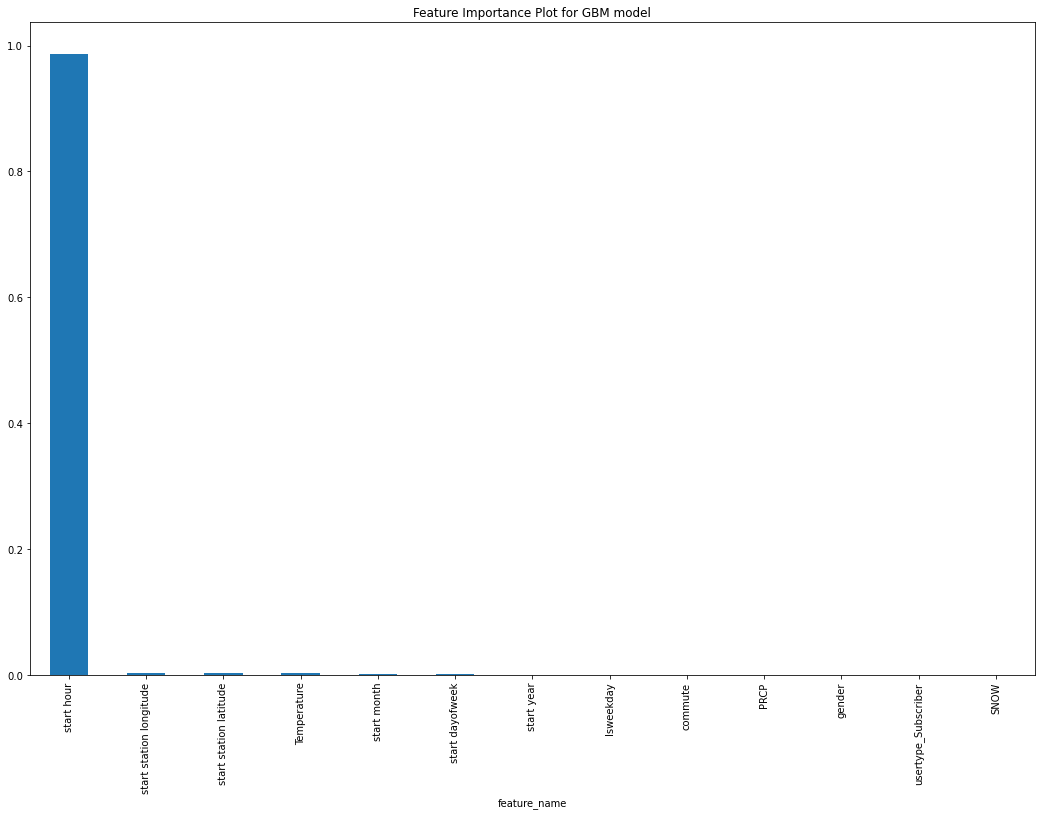

In [27]:
plt.rcParams['figure.figsize'] = (18,12)
a, b = zip(*sorted_importance_gbm) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Plot for GBM model')

In [28]:
grid_params = {'max_depth': range(4,8,3),
                'learning_rate':np.linspace(0.02,0.12,3),
               "min_samples_split": np.linspace(start=5, stop=20, num=4, dtype=int)}
grid_search_gbm = GridSearchCV(gbm, grid_params, cv = 3)
grid_search_gbm.fit(X_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.3623           0.0116           10.41m
         2           0.3493           0.0112           10.53m
         3           0.3404           0.0107           10.32m
         4           0.3304           0.0103            9.63m
         5           0.3200           0.0099            9.13m
         6           0.3094           0.0095            8.72m
         7           0.3021           0.0091            8.63m
         8           0.2921           0.0087            8.99m
         9           0.2855           0.0084           10.03m
        10           0.2770           0.0081           11.76m
        20           0.2121           0.0054           11.88m
        30           0.1688           0.0036           12.17m
        40           0.1385           0.0024           13.21m
        50           0.1184           0.0016           13.08m
        60           0.1065           0.0011           12.87m
       

        80           0.0891           0.0005           10.38m
        90           0.0868           0.0003           10.27m
       100           0.0839           0.0002           10.12m
       200           0.0781           0.0000            8.64m
       300           0.0776           0.0000            7.35m
       400           0.0774           0.0000            6.35m
       500           0.0774          -0.0000            5.29m
       600           0.0777           0.0000            4.25m
       700           0.0772          -0.0000            3.20m
       800           0.0759           0.0000            2.11m
       900           0.0772           0.0000            1.05m
      1000           0.0766          -0.0000            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.3619           0.0116           10.26m
         2           0.3511           0.0112           10.06m
         3           0.3407           0.0107           10.29m
       

         5           0.3200           0.0099            7.63m
         6           0.3094           0.0095            7.70m
         7           0.3021           0.0091            7.74m
         8           0.2921           0.0087            7.72m
         9           0.2855           0.0084            7.68m
        10           0.2770           0.0081            7.64m
        20           0.2121           0.0054            7.66m
        30           0.1688           0.0036            7.48m
        40           0.1385           0.0024            7.37m
        50           0.1184           0.0016            7.29m
        60           0.1065           0.0011            7.17m
        70           0.0966           0.0007            7.09m
        80           0.0904           0.0005            7.00m
        90           0.0876           0.0003            6.91m
       100           0.0856           0.0002            6.82m
       200           0.0795           0.0000            6.01m
       3

       400           0.0715           0.0000           11.42m
       500           0.0704          -0.0000            9.46m
       600           0.0698          -0.0000            7.73m
       700           0.0683          -0.0000            5.78m
       800           0.0661          -0.0000            3.84m
       900           0.0667           0.0000            2.01m
      1000           0.0651          -0.0000            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.3619           0.0117           11.73m
         2           0.3510           0.0112           16.10m
         3           0.3405           0.0107           19.68m
         4           0.3301           0.0103           20.78m
         5           0.3184           0.0099           20.30m
         6           0.3094           0.0096           19.44m
         7           0.3017           0.0091           18.44m
         8           0.2934           0.0087           17.61m
       

        10           0.2766           0.0081           32.28m
        20           0.2114           0.0054           31.13m
        30           0.1678           0.0036           29.97m
        40           0.1373           0.0024           28.72m
        50           0.1171           0.0016           27.76m
        60           0.1050           0.0011           27.14m
        70           0.0949           0.0007           26.55m
        80           0.0886           0.0005           26.12m
        90           0.0857           0.0003           27.64m
       100           0.0836           0.0002           30.02m
       200           0.0764           0.0000           28.35m
       300           0.0747           0.0000           23.49m
       400           0.0730          -0.0000           19.51m
       500           0.0721          -0.0000           15.78m
       600           0.0711           0.0000           12.90m
       700           0.0702          -0.0000            9.75m
       8

       900           0.0683          -0.0000            3.39m
      1000           0.0668          -0.0000            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.3619           0.0117           39.40m
         2           0.3510           0.0112           44.60m
         3           0.3405           0.0107           67.38m
         4           0.3301           0.0103           70.62m
         5           0.3184           0.0099           71.37m
         6           0.3094           0.0096           74.91m
         7           0.3017           0.0091           75.81m
         8           0.2934           0.0087           74.61m
         9           0.2847           0.0084           75.03m
        10           0.2762           0.0081           75.70m
        20           0.2095           0.0054           70.55m
        30           0.1655           0.0036           60.41m
        40           0.1366           0.0024           57.31m
       

        60           0.0798           0.0000           28.30m
        70           0.0785           0.0000           27.19m
        80           0.0780           0.0000           26.38m
        90           0.0789           0.0000           25.65m
       100           0.0796           0.0000           25.14m
       200           0.0781          -0.0000           21.55m
       300           0.0774           0.0000           21.30m
       400           0.0765          -0.0000           17.99m
       500           0.0765          -0.0000           15.11m
       600           0.0764          -0.0000           12.10m
       700           0.0762          -0.0000            8.82m
       800           0.0747          -0.0000            5.94m
       900           0.0761          -0.0000            2.97m
      1000           0.0747          -0.0000            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.3322           0.0396           20.15m
       

         3           0.2704           0.0296           25.15m
         4           0.2448           0.0257           26.48m
         5           0.2211           0.0223           26.59m
         6           0.2024           0.0193           25.36m
         7           0.1868           0.0166           23.13m
         8           0.1726           0.0143           21.27m
         9           0.1600           0.0124           19.82m
        10           0.1491           0.0107           18.75m
        20           0.0953           0.0025           17.58m
        30           0.0828           0.0006           19.63m
        40           0.0797           0.0001           30.77m
        50           0.0796           0.0000           32.53m
        60           0.0797           0.0000           31.78m
        70           0.0796           0.0000           33.63m
        80           0.0786           0.0000           34.61m
        90           0.0791           0.0000           34.48m
       1

KeyboardInterrupt: 

In [ ]:
grid_search_gbm.best_param_

In [ ]:
grid_search_gbm.score(X_train,y_train)

In [ ]:
grid_search_gbm.score(X_test,y_test

## Random Forest

In [30]:
randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(random_state=42, n_estimators=100, max_features=5)
randomForest.fit(X_train, y_train)
randomForest.score(X_train, y_train)

0.9586228542515488

In [31]:
print("The training is: %.5f" % (randomForest.score(X_train, y_train)))
print("The test     is: %.5f" % (randomForest.score(X_test, y_test)))

The training is: 0.95862
The test     is: 0.83998


In [32]:
sorted_importance = sorted(zip(X_train.columns.values, randomForest.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('start hour', 0.8032038942992658),
 ('start station longitude', 0.043411708064906074),
 ('start station latitude', 0.04325969358846756),
 ('commute', 0.03627943116150824),
 ('Temperature', 0.029516729464061305),
 ('start dayofweek', 0.012872174619988625),
 ('gender', 0.010570164852749015),
 ('start month', 0.008054307874404035),
 ('usertype_Subscriber', 0.005113177619958014),
 ('PRCP', 0.004453327346143335),
 ('Isweekday', 0.001427982533029751),
 ('start year', 0.0009554608397965701),
 ('SNOW', 0.0008819477357218168)]

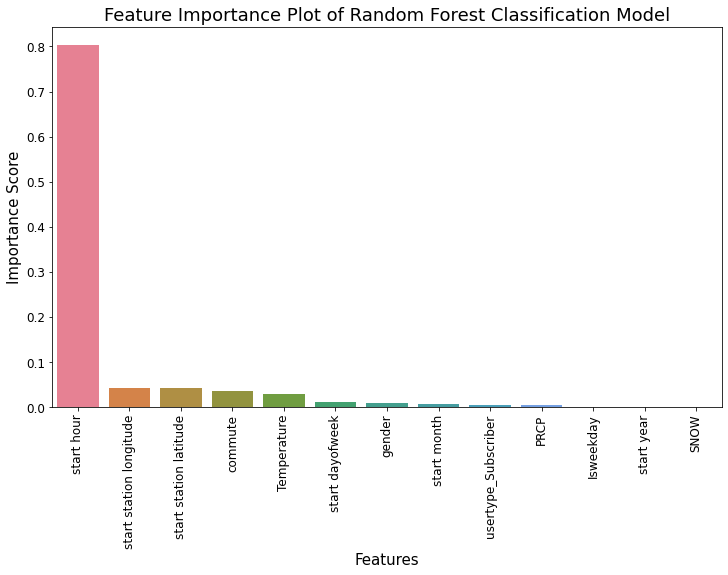

In [36]:
plt.rcParams['figure.figsize'] = (12,7)
a, b = zip(*sorted_importance) 
sns.barplot(x = 'feature_name', y = 'importance_score', data = pd.DataFrame({'feature_name':a, 'importance_score':b}),\
            palette='husl')
plt.title('Feature Importance Plot of Random Forest Classification Model', fontsize = 18)
plt.xlabel('Features',fontsize = 15)
plt.ylabel('Importance Score',fontsize = 15)
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90,fontsize = 12);